In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(454, 687, 3)


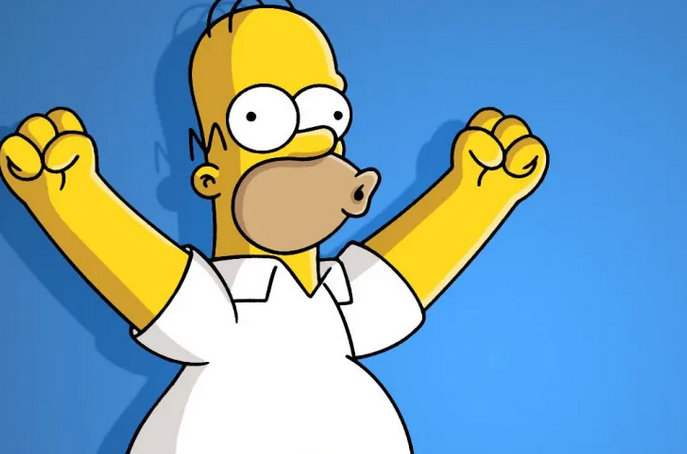

In [91]:
images = ["marilyn-monroe.png", "simpsons.png", "spiderman.jpg"]
index = 1
image = cv2.imread(images[index])
print(image.shape)
cv2_imshow(image)

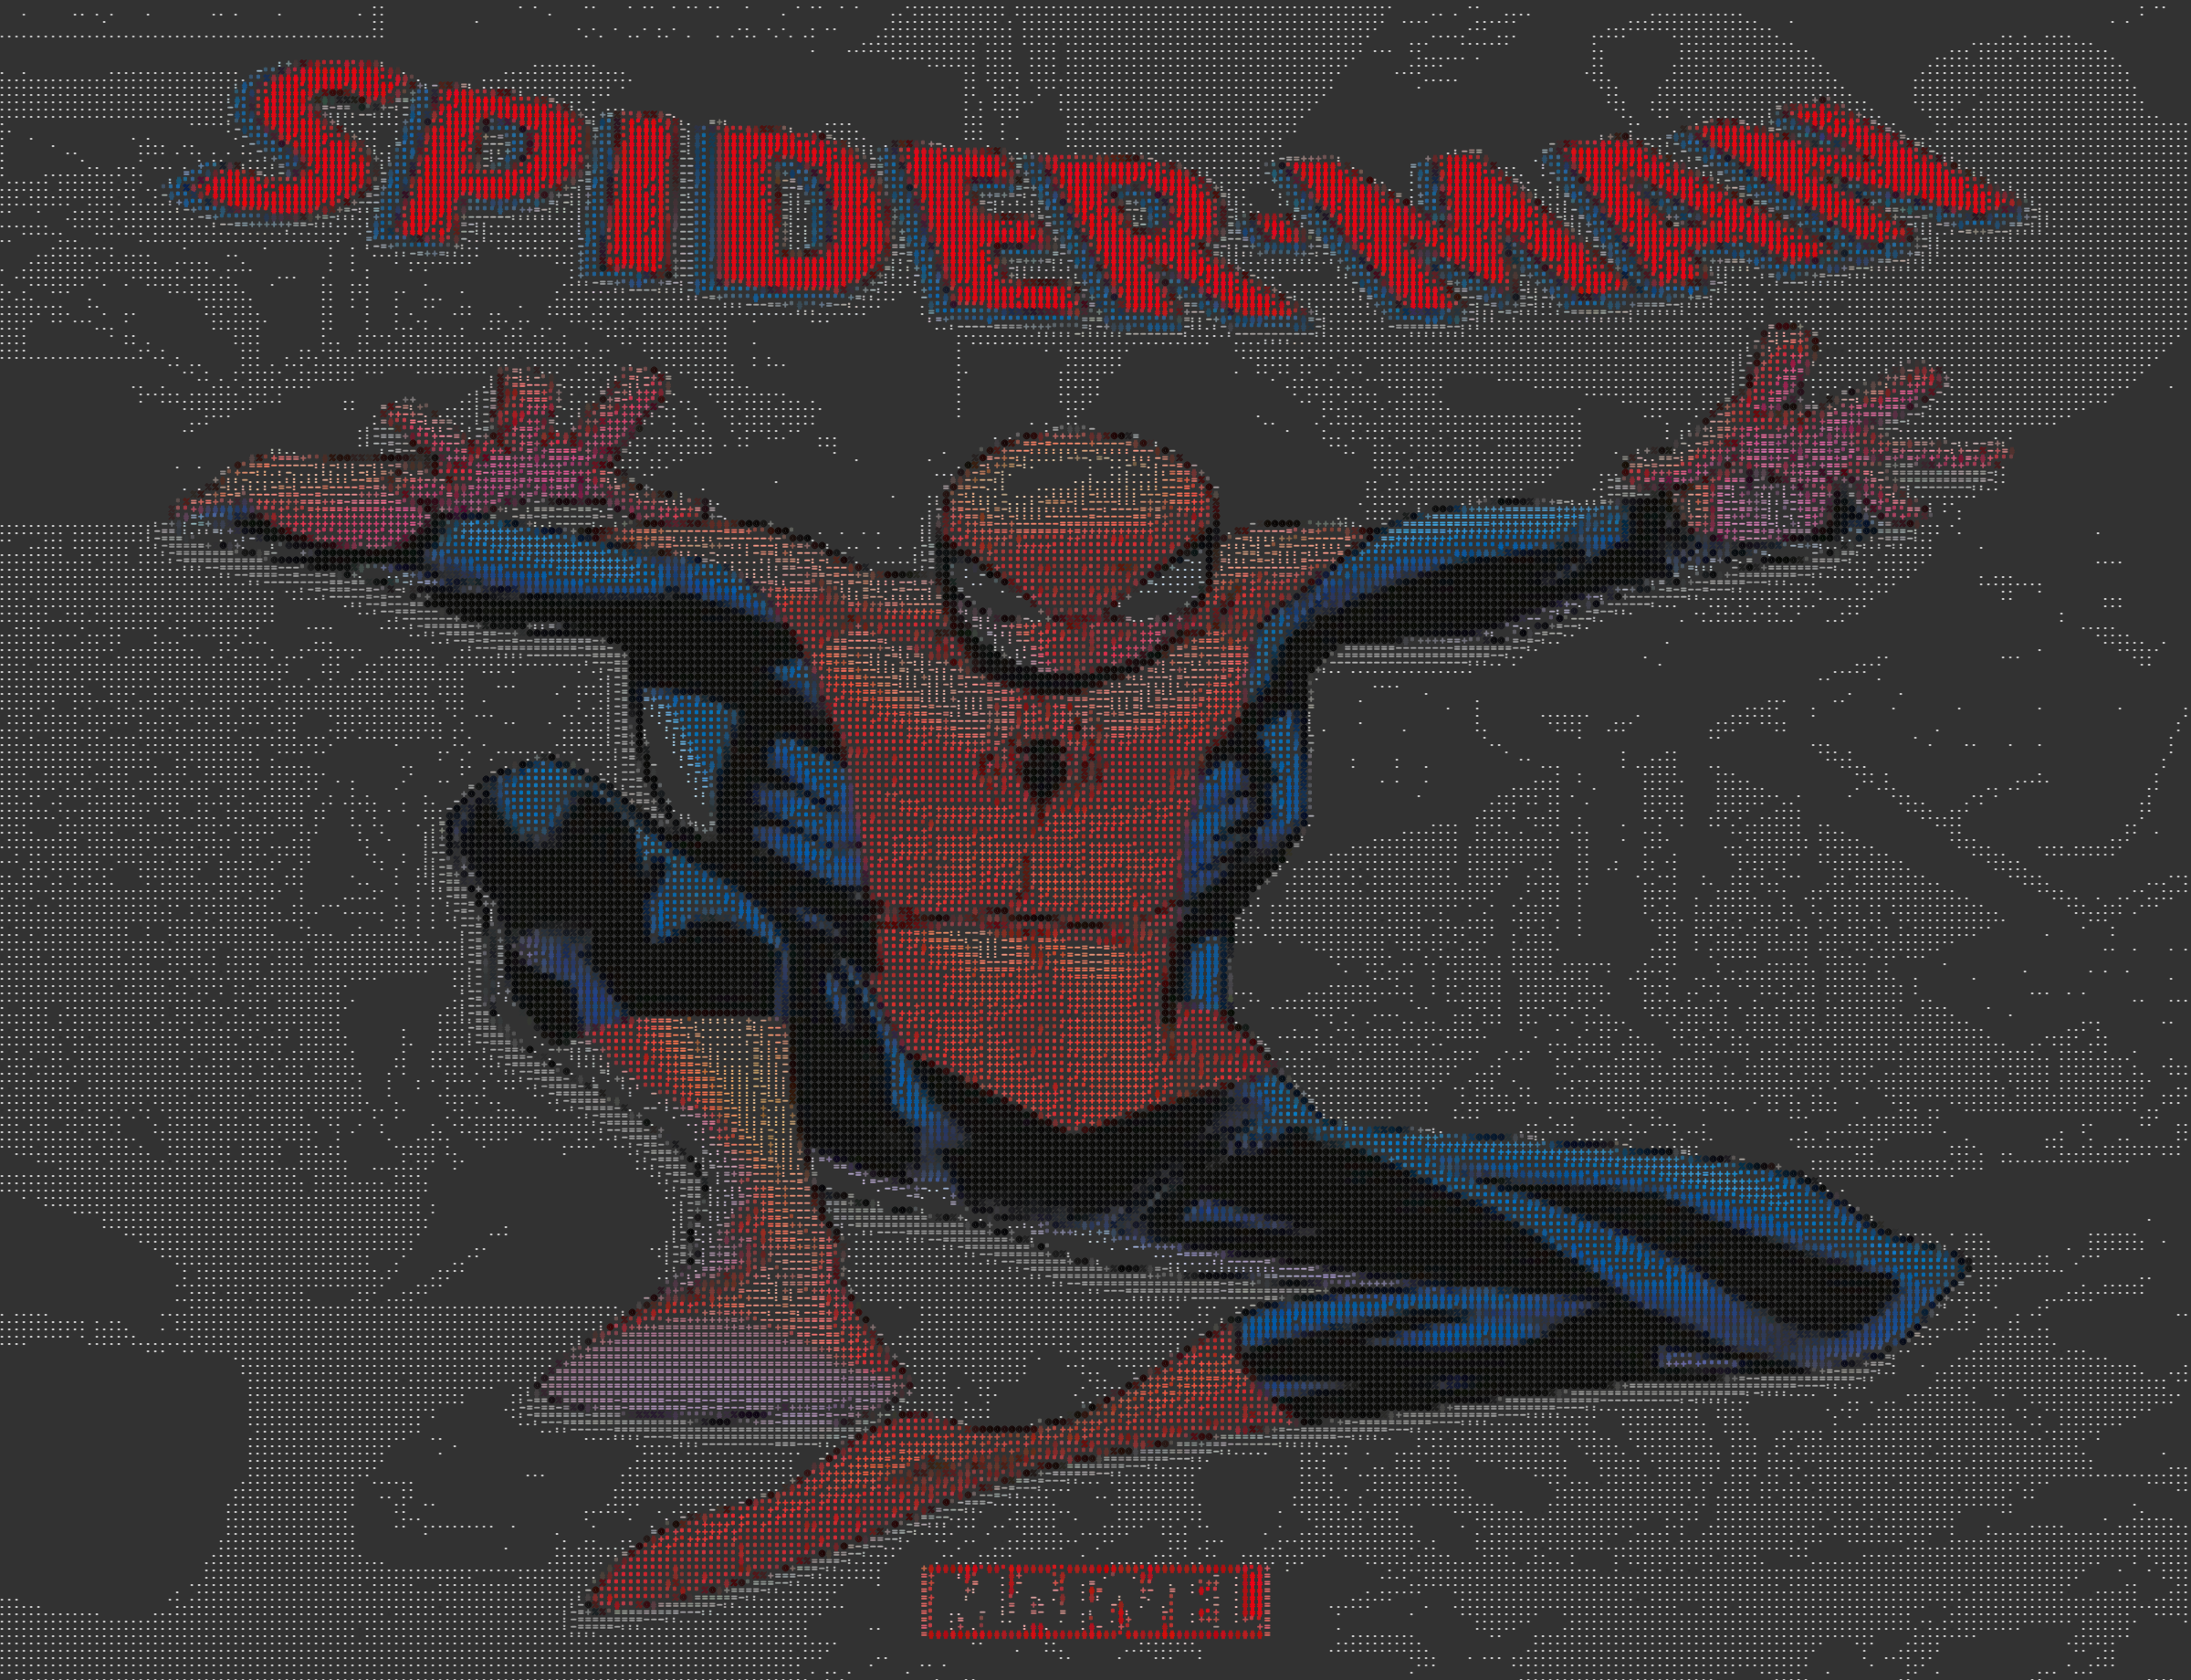

In [100]:
def img2ascii(image_path, output_width=100, output_path="ascii_art.jpg", save=False):
    image = cv2.imread(image_path)

    ASCII_CHARS = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,^`'."
    ASCII_CHARS = "@%#*+=-:. "

    # Resize the image based on the desired output width
    height, width, _ = image.shape
    aspect_ratio = height / width
    new_height = int(output_width * aspect_ratio * 0.5)  # Adjust height for ASCII aspect ratio
    resized_image = cv2.resize(image, (output_width, new_height))

    # Convert to grayscale for ASCII mapping
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Create a blank white canvas for output ASCII art image
    font_scale = 0.3
    font_thickness = 1
    font = cv2.FONT_HERSHEY_TRIPLEX
    character_width = 8  # estimated width of each ASCII character
    character_height = int(character_width * aspect_ratio) # estimated height of each ASCII character
    character_height = 8
    ascii_image_width = character_width * output_width
    ascii_image_height = character_height * new_height
    ascii_image = np.ones((ascii_image_height, ascii_image_width, 3), dtype=np.uint8) * 50

    # Draw ASCII characters with color onto the canvas
    for y in range(new_height):
        for x in range(output_width):
            pixel_gray = gray_image[y, x]
            ascii_char = ASCII_CHARS[int(pixel_gray / 256 * len(ASCII_CHARS))]
            color = resized_image[y, x]  # Original color in BGR

            # Calculate position on the canvas
            pos_x = x * character_width
            pos_y = y * character_height + character_height

            # Draw the ASCII character
            cv2.putText(
                ascii_image,
                ascii_char,
                (pos_x, pos_y),
                font,
                font_scale,
                (int(color[0]), int(color[1]), int(color[2])),  # BGR color for OpenCV
                font_thickness,
                lineType=cv2.LINE_AA
            )
    cv2_imshow(ascii_image)

    # Save the ASCII art image
    if save:
        cv2.imwrite(output_path, ascii_image)
        print(f"ASCII art image saved to {output_path}")

img2ascii(images[2], output_width=300, output_path="ascii_art.jpg")
